# Reconhecimento Facial do Leonardo

O projeto a seguir foi desenvolvido para testar a biblioteca de reconhecimento facial __DeepFace__. Primeiro serão feitas algumas manipulações da camera e testes usando a biblioteca __OpenCV__, depois o reconhecimento facial é testado em duas imagens e por fim, na imagem da câmera em tempo real.

Alguns blocos de códigos não estão excecutados porque exigem uma interação do usuário e cada um funciona como uma aplicação para o reconhecimento das imagens da Webcam.

### Importar as bibliotecas

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

### Conectar a uma webcam

In [2]:
cap = cv.VideoCapture(1)

In [3]:
# Obter um frame do dispositivo
ret, frame = cap.read()

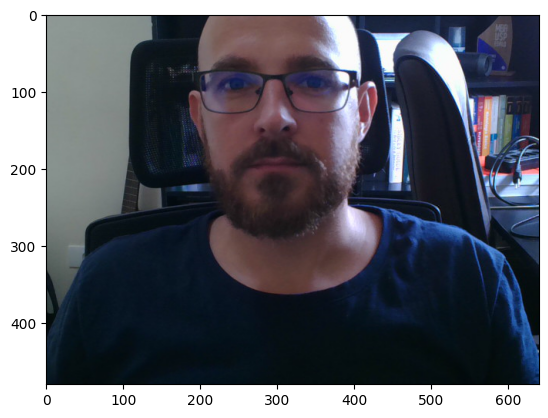

In [4]:
# Visualizar a imagem capturada
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

In [5]:
cap.release()

In [ ]:
# Definição de uma função para capturar uma foto
# O argumento camera_id é o id da camera que será usada (geralmente a camera do notebook é 0)
def take_photo(camera_id):
    cap = cv.VideoCapture(camera_id)
    ret, frame = cap.read()
    cv.imwrite('imagens/minhaFoto.jpg', frame)
    cap.release

In [ ]:
take_photo(1)

## Renderizar imagem em tempo real

In [ ]:
cap = cv.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()

    cv.imshow('Imagem da camera', frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

## Reconhecimento facial usando DeepFace

Para testar a biblioteca utilizei uma foto minha como referencia e comparei com outra foto minha e com a imagem de outra pessoa.

No primeiro caso, usei uma foto minha (quase a mesma 😒) para ver se o reconhecimento foi feito corretamente.

|<img src="imagens/leonardo1.jpg">|<img src="imagens/leonardo2_labeled.jpg">|
|:---:|:---:|
|**Fig.1-Imagen de referencia**|**Fig.1-Imagen testada**|

O segundo teste foi usando uma imagem do 🛡️Ragnar⚔️ para comparação com minha foto. O objetivo do sergundo teste foi verifiar se o reconhecimento é capaz de 'acertar' 🤔 ao identificar outra pessoa como Falso. 

|<img src="imagens/leonardo1.jpg" width="70%">|<img src="imagens/ragnar_labeled.jpg" width="120%">|
|:---:|:---:|
|**Fig.1-Imagen de referencia**|**Fig.1-Imagen testada**|


In [6]:
#Uso da função verify do pacote deepface para reconhecimento usando duas fotos minhas
from deepface import DeepFace
DeepFace.verify(img1_path='imagens/leonardo2.jpg', img2_path='imagens/leonardo1.jpg')

{'verified': True,
 'distance': 0.17719328758350672,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 783, 'y': 189, 'w': 523, 'h': 523},
  'img2': {'x': 770, 'y': 206, 'w': 540, 'h': 540}},
 'time': 2.54}

In [7]:
#Uso da função verify do pacote deepface para reconhecimento usando duas fotos minhas
from deepface import DeepFace
DeepFace.verify(img1_path='imagens/leonardo2.jpg', img2_path='imagens/ragnar.jpg')

{'verified': False,
 'distance': 0.7966887422065851,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 783, 'y': 189, 'w': 523, 'h': 523},
  'img2': {'x': 274, 'y': 9, 'w': 439, 'h': 439}},
 'time': 0.86}

### Implementando o reconhecimento facial em tempo real

Agora é a hora de juntar tudo e fazer o reconhecimento facial em tempo real usando minha foto de referencia para identificação.

In [ ]:
import cv2 as cv
import threading
from deepface import DeepFace

# Define a altura e largura do vídeo e o tamanho do quadro para salvar
largura = 640
altura = 480
tamanho = (largura, altura) 

# Salva o video no formato avi
videoCapturado = cv.VideoWriter('videos/teste_reconhecimento.mp4',  
                         cv.VideoWriter_fourcc(*'MP4V'), 
                         10, tamanho) 

# Inidia a captura de video e seta a altura e larguda do quadro
cap = cv.VideoCapture(1)
cap.set(cv.CAP_PROP_FRAME_WIDTH, largura)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, altura)

# Define um contador uma flag se a imagem foi reconhecida ou não e carrega a imagem de referência para comparação com o vídeo capturado=
contador = 0
referencia_reconhecida = False
referencia = cv.imread('imagens/leonardo1.jpg')

# Define a função para reconhecimento facial usando o método verify do pacote DeepFace
def check_face(frame):

    global referencia_reconhecida
    
    try:
        if DeepFace.verify(img1_path=frame, img2_path=referencia.copy())['verified']:
            referencia_reconhecida = True
        else: 
            referencia_reconhecida = False
    except ValueError:
        referencia_reconhecida = False


# Inicia a iteração para fazer a identificação 
while True:
    ret, frame = cap.read()

    if ret:
        
        if contador % 30 == 0:
            try:
                threading.Thread(target=check_face, args = (frame.copy(),)).start()
            except ValueError:
                pass

        contador += 1

        if referencia_reconhecida:
            cv.putText(frame, "Agora sim, Leonardo!", (20,450), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 3)
        else:
            cv.putText(frame, "Deve ser o Ragnar, de novo!", (20,450), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 3)
        
        videoCapturado.write(frame) 
        cv.imshow('Imagem da camera', frame)

    key = cv.waitKey(1)
    if key == ord("q"):
        break

videoCapturado.release() 
cap.release()
cv.destroyAllWindows()

### Script adicional para cortar o vídeo no tempo desejado

In [ ]:
import cv2

def cortar_video(entrada, saida, inicio_segundos, fim_segundos):
    # Abrir o vídeo de entrada
    cap = cv2.VideoCapture(entrada)

    # Obter a taxa de quadros por segundo (FPS) e a largura/altura do vídeo
    fps = cap.get(cv2.CAP_PROP_FPS)
    largura = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    altura = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Calcular o número total de quadros no vídeo
    total_quadros = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calcular os quadros correspondentes aos tempos de início e fim desejados
    inicio_quadro = int(inicio_segundos * fps)
    fim_quadro = int(fim_segundos * fps)

    # Garantir que os quadros de início e fim estejam dentro dos limites do vídeo
    inicio_quadro = max(0, min(inicio_quadro, total_quadros - 1))
    fim_quadro = max(0, min(fim_quadro, total_quadros - 1))

    # Configurar o objeto de gravação para o vídeo de saída
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(saida, fourcc, fps, (largura, altura))

    # Avançar para o quadro de início
    cap.set(cv2.CAP_PROP_POS_FRAMES, inicio_quadro)

    # Loop para ler e gravar os quadros no intervalo desejado
    for quadro_atual in range(inicio_quadro, fim_quadro + 1):
        ret, frame = cap.read()
        if ret:
            out.write(frame)
        else:
            break

    # Liberar os objetos de captura e gravação
    cap.release()
    out.release()

# Exemplo de uso:
entrada_video = 'videos/teste_reconhecimento.mp4'
saida_video = 'videos/teste_reconhecimento_cortado.mp4'
inicio_segundos = 50  # Início do período desejado em segundos
fim_segundos = 73    # Fim do período desejado em segundos

cortar_video(entrada_video, saida_video, inicio_segundos, fim_segundos)


### Converter o vídeo em um GIF

Caso queira salvar o vídeo no formato .gif

In [ ]:
from moviepy.editor import VideoFileClip
videoClip = VideoFileClip("videos/teste_reconhecimento_cortado.mp4")
videoClip.write_gif("videos/teste_reconhecimento.gif", fps = 20)